# 🧠 Simple CNN for Image Classification on MNIST using PyTorch 🔥

<div align="center">

![AI Brain](https://media.giphy.com/media/3oKIPEqDGUULpEU0aQ/giphy.gif)

![PyTorch](https://img.shields.io/badge/PyTorch-EE4C2C?style=for-the-badge&logo=pytorch&logoColor=white)
![Python](https://img.shields.io/badge/Python-3776AB?style=for-the-badge&logo=python&logoColor=white)
![Jupyter](https://img.shields.io/badge/Jupyter-F37626.svg?&style=for-the-badge&logo=Jupyter&logoColor=white)
![Deep Learning](https://img.shields.io/badge/Deep%20Learning-FF6F00?style=for-the-badge&logo=tensorflow&logoColor=white)

</div>

---

## 🎯 **MNIST Digit Classification Challenge** 🎯

![Neural Network Animation](https://media.giphy.com/media/l46Cy1rHbQ92uuLXa/giphy.gif)

This notebook demonstrates a **Convolutional Neural Network (CNN)** implementation for handwritten digit recognition using the famous MNIST dataset. We'll build, train, and evaluate a simple yet effective CNN architecture to classify digits 0-9. 📊✨

<div align="center">

**🚀 READY TO TRAIN A NEURAL NETWORK? LET'S GO! 🚀**

![Rocket Launch](https://media.giphy.com/media/26BRzozg4TCBXv6QU/giphy.gif)

</div>

Authored by T Mohamed Yaser

## 📋 Table of Contents

<div align="center">

![Table of Contents](https://media.giphy.com/media/3oKIPnAiaMCws8nOsE/giphy.gif)

</div>

1. [📦 Import Required Libraries](#imports) 
2. [🏗️ CNN Architecture Definition](#architecture) 
3. [🎯 Model Initialization & Summary](#initialization) 
4. [📊 Data Loading & Preprocessing](#data-loading) 
5. [👀 Dataset Visualization](#visualization) 
6. [🚀 Training Loop](#training) 
7. [💾 Save Trained Model](#saving) 
8. [🔍 Model Inference & Evaluation](#inference) 
9. [📈 Comprehensive Performance Metrics](#metrics) 

---

## 🎯 Project Overview

<div align="center">

![Project Overview](https://media.giphy.com/media/xT9IgzoKnwFNmISR8I/giphy.gif)

</div>

**🎯 Objective:** Build a Convolutional Neural Network to classify handwritten digits (0-9) from the MNIST dataset.

### ✨ **Key Features:**
- ✅ Simple yet effective CNN architecture
- ✅ GPU acceleration support 🚀
- ✅ Real-time training progress tracking 📊
- ✅ Comprehensive evaluation metrics 📈
- ✅ Model persistence for deployment 💾

<div align="center">

**🎯 Expected Accuracy: > 95% on test set 🎯**

![Target](https://media.giphy.com/media/26BRuo6sLetdllPAQ/giphy.gif)

</div>

---

### 🔥 **What You'll Learn:**

<div align="center">

![Learning](https://media.giphy.com/media/WUlplcMpOCEmTGBtBW/giphy.gif)

</div>

- 🧠 **Deep Learning Fundamentals**
- 🏗️ **CNN Architecture Design**
- 🎯 **Image Classification Techniques**
- 📊 **Model Evaluation & Metrics**
- 🚀 **PyTorch Implementation**

### Imports

## 📦 Import Required Libraries

<div align="center">

![Import Libraries](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExOWJuOGhibGRtYnJqd3lnZzMyMTRpZW5mbHRpazRoYmhxOHBjcXlxNyZlcD12MV9naWZzX3NlYXJjaCZjdD1n/l0HlRnAWXxn0MhKLK/giphy.gif)

</div>

Import all necessary libraries for our CNN implementation:

### 🔥 **Core Deep Learning:**
- **PyTorch** for deep learning operations 🔥
- **torchvision** for MNIST dataset and transforms 🖼️

### 📊 **Visualization & Analytics:**
- **matplotlib & seaborn** for stunning visualizations 📈
- **sklearn** for comprehensive evaluation metrics 📊

### ⚡ **Performance & UX:**
- **tqdm** for beautiful progress bars ⏳
- **numpy** for numerical computations 🔢

<div align="center">

![Coding](https://media.giphy.com/media/ZVik7pBtu9dNS/giphy.gif)

**🚀 Let's import and get started! 🚀**

</div>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, models
from torchsummary import summary
import torchvision
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix

### Definition for CNN Architecture

## 🏗️ CNN Architecture Definition

<div align="center">

![CNN Architecture](https://media.giphy.com/media/l46Cy1rHbQ92uuLXa/giphy.gif)

</div>

Define our **Convolutional Neural Network** architecture:

### 🧠 **Layer-by-Layer Breakdown:**

<div align="center">

![Building Blocks](https://media.giphy.com/media/xT9IgzoKnwFNmISR8I/giphy.gif)

</div>

- 🔄 **2 Convolutional layers** with ReLU activation 
- 📉 **Max pooling** for dimensionality reduction 
- 🛡️ **Dropout layers** to prevent overfitting 
- 🎯 **Fully connected layers** for final classification 

### 🌊 **Data Flow Architecture:**

```
📊 Input: 28x28 → 🔄 Conv1 → 🔄 Conv2 → 📉 Pool → 🔀 Flatten → 🎯 FC1 → 🎯 FC2 → 🎉 10 classes
```

<div align="center">

![Neural Network](https://media.giphy.com/media/3oKIPnAiaMCws8nOsE/giphy.gif)

**🏗️ Time to build our CNN! 🏗️**

</div>

In [17]:
class SimpleCNNForMNIST(nn.Module):
    def __init__(self):
        super(SimpleCNNForMNIST, self).__init__()
        # First convolutional layer: 1 input channel (grayscale image), 32 output channels, kernel size 3
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        # Second convolutional layer: 32 input channels, 64 output channels, kernel size 3
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        # Max pooling
        self.pool = nn.MaxPool2d(2, 2)
        # Dropout layer
        self.dropout1 = nn.Dropout(0.25)  # A Dropout layer randomly sets a fraction of input units to 0 at each update during training time,
                                          # helping prevent overfitting by reducing the model's sensitivity to the specific weights of individual neurons.
        # Flatten layer
        self.flatten = nn.Flatten()
        # Fully connected layers - Fixed: 64 * 14 * 14 = 12544
        self.fc1 = nn.Linear(64 * 14 * 14, 128)
        self.dropout2 = nn.Dropout(0.5) # Dropout 50% of neurons in fc1
        self.fc2 = nn.Linear(128, 10)  # 10 output classes for MNIST

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout1(x)
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout2(x)
        x = self.fc2(x)
        return x

In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNNForMNIST().to(device)
summary(model, (1, 28, 28))  # (Channels, Height, Width)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
            Conv2d-2           [-1, 64, 28, 28]          18,496
         MaxPool2d-3           [-1, 64, 14, 14]               0
           Dropout-4           [-1, 64, 14, 14]               0
           Flatten-5                [-1, 12544]               0
            Linear-6                  [-1, 128]       1,605,760
           Dropout-7                  [-1, 128]               0
            Linear-8                   [-1, 10]           1,290
Total params: 1,625,866
Trainable params: 1,625,866
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.86
Params size (MB): 6.20
Estimated Total Size (MB): 7.07
----------------------------------------------------------------


## 🎯 Model Initialization & Summary

<div align="center">

![Model Initialization](https://media.giphy.com/media/3o7qE1YN7aBOFPRw8E/giphy.gif)

</div>

Initialize the CNN model and display its architecture:

### 🚀 **Initialization Steps:**
- **GPU acceleration** detection and setup 🚀
- **Model instantiation** and device transfer 📱
- **Architecture summary** with layer-wise parameters 📋
- **Parameter counting** for complexity analysis 🔢

<div align="center">

![GPU Power](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExYjQ5cGJjOWtnZGl3YWQ1Njh6ZHd6emY5dzR2cGJrZ2tiYmJhaDR0cCZlcD12MV9naWZzX3NlYXJjaCZjdD1n/ucnflJBmAIDSIQ3w67/giphy.gif)

**⚡ Powering up the neural network! ⚡**

</div>

> 💡 **Pro Tip:** GPU acceleration can speed up training by 10-50x compared to CPU!

### DataLoaders

## 📊 Data Loading & Preprocessing

<div align="center">

![Data Loading](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExNzl3c3Z0a3pna285Y3A5ODRybXNta3o5ZjRsMTdkYXBoMmdpbWI2cyZlcD12MV9naWZzX3NlYXJjaCZjdD1n/6FWpozKBgrQD4MZwDC/giphy.gif)

</div>

Set up **MNIST dataset** with proper preprocessing:

### 📥 **Data Pipeline:**

<div align="center">

![Data Pipeline](https://media.giphy.com/media/l46CbZ7KWEhN1oci4/giphy.gif)

</div>

- 📏 **Normalization** to [-1, 1] range for optimal training 
- 📂 **Train/Test split** (60,000 train + 10,000 test samples) 
- ⚡ **DataLoaders** with batch size 64 for efficient GPU utilization 
- 📥 **Automatic download** of MNIST dataset 

### 🎯 **Dataset Stats:**
- **Training Images:** 60,000 📊
- **Test Images:** 10,000 🧪
- **Image Size:** 28x28 pixels 📐
- **Classes:** 10 digits (0-9) 🔢

<div align="center">

![Loading Data](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExZndqcDViYmNoNzN0cXVkb3N6MW81c2x0ZDI1cWk5Yml2OHZsc2doeCZlcD12MV9naWZzX3NlYXJjaCZjdD1n/gH6jM4xcOCEyRCYKpT/giphy.gif)

**📊 Loading the famous MNIST dataset! 📊**

</div>

In [8]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize for a single channel
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9.91M/9.91M [00:03<00:00, 3.26MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 123kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 857kB/s] 
100%|██████████| 4.54k/4.54k [00:00<?, ?B/s]


### Dataset Visualization

## 👀 Dataset Visualization

<div align="center">

![Data Visualization](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExZndqcDViYmNoNzN0cXVkb3N6MW81c2x0ZDI1cWk5Yml2OHZsc2doeCZlcD12MV9naWZzX3NlYXJjaCZjdD1n/CtqI1GmvT0YVO/giphy.gif)

</div>

Visualize sample images from the training dataset:

### 🎨 **Visualization Features:**
- 🔢 **5x5 grid** showing 25 handwritten digits 
- 🎨 **De-normalization** for proper display 
- 🧐 **Data exploration** before training the model 
- 📊 **Understanding data distribution**

<div align="center">

![MNIST Digits](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

</div>

### 🔍 **What to Look For:**
- ✅ **Clear digit shapes**
- ✅ **Variety in handwriting styles**
- ✅ **Different stroke thickness**
- ✅ **Proper normalization**

<div align="center">

![Magnifying Glass](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExcDkyOWNidW0wbG9sOWd1ejBxMXJ0eWF5aWpzc2Z4YnU2enA4bm5uNCZlcD12MV9naWZzX3NlYXJjaCZjdD1n/42wQXwITfQbDGKqUP7/giphy.gif)

**👀 Let's explore our data! 👀**

</div>

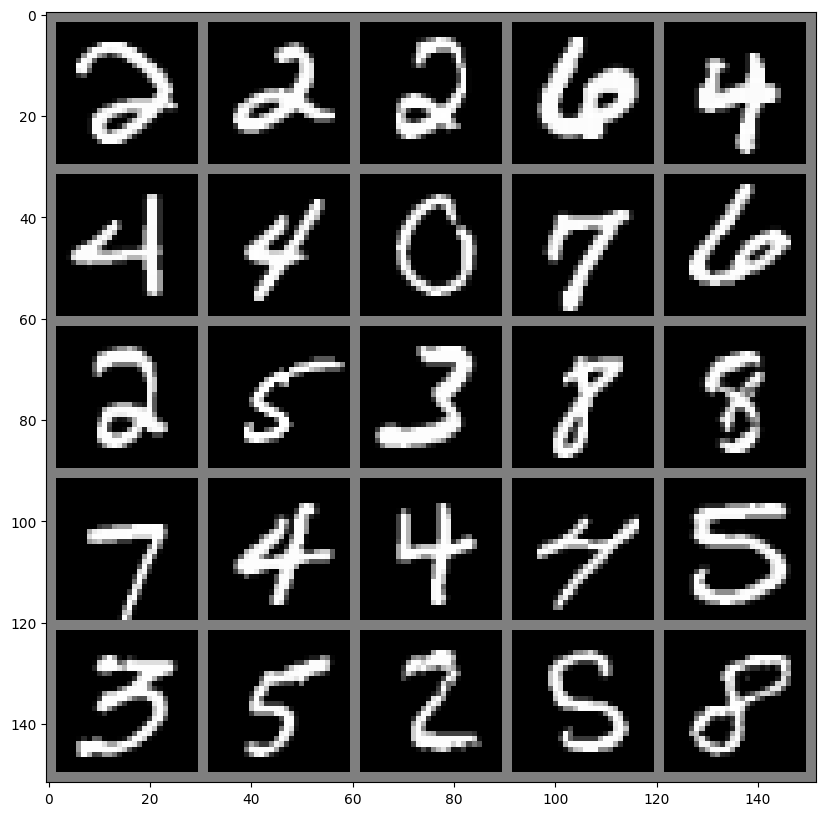

In [9]:
# Load a batch of images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Function to show images
def imshow(img):
    img = img / 2 + 0.5  # De-normalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# Show images in a 5x5 grid
plt.figure(figsize=(10, 10))
imshow(torchvision.utils.make_grid(images[:25], nrow=5))
plt.show()

### Training Loop

## 🚀 Training Loop

<div align="center">

![Training](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExN3l5a3k4ZzJtb3p3NjFvaGVhZjBpb3UwaHVydHd6bGY0c2lxOGtlZCZlcD12MV9naWZzX3NlYXJjaCZjdD1n/1iTH1WIUjM0VATSw/giphy.gif)

</div>

Train the CNN model with the following setup:

### ⚙️ **Training Configuration:**

<div align="center">

![Settings](https://media.giphy.com/media/3oKIPEqDGUULpEU0aQ/giphy.gif)

</div>

- ⚙️ **Adam optimizer** with learning rate 0.001 
- 📊 **CrossEntropyLoss** for multi-class classification 
- ⏰ **10 epochs** for comprehensive training 
- 📈 **Progress bars** with real-time loss tracking 
- 💨 **GPU acceleration** for blazing fast training 

### 🎯 **Training Process:**

```
🔄 For each epoch:
  📊 Load batch → 🧠 Forward pass → 📉 Calculate loss → 🔄 Backward pass → ⬆️ Update weights
```

<div align="center">

![Neural Network Training](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExb21uNHZqc3UzcnAydzNjYThoMGhpaTlqdTBpbnZ5NGhyazY5cm80ayZlcD12MV9naWZzX3NlYXJjaCZjdD1n/2bYewTk7K2No1NvcuK/giphy.gif)

**🔥 Time to train our neural network! 🔥**

</div>

> **📉 Expected Result:** Loss should decrease progressively across epochs!

<div align="center">

![Decreasing Loss](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExczJ1MXp1dnZxM2J6d2JvNzk4cHJiNGY3aTZzMGdyZWppbXB2OWFueCZlcD12MV9naWZzX3NlYXJjaCZjdD1n/chymWBuNO7odQ0lFM4/giphy.gif)

</div>

In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 10  # Or whatever you deem appropriate

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    with tqdm(train_loader, unit="batch") as tepoch:
        for images, labels in tepoch:
            tepoch.set_description(f"Epoch {epoch+1}")
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            tepoch.set_postfix(loss=running_loss/len(train_loader))

Epoch 10: 100%|██████████| 938/938 [04:11<00:00,  3.73batch/s, loss=0.0281] 


In [20]:
torch.save(model.state_dict(), 'last-best-model.pth')

## 💾 Save Trained Model

<div align="center">

![Saving Model](https://media.giphy.com/media/xT9IgzoKnwFNmISR8I/giphy.gif)

</div>

Save the trained model weights for future use:

### 💾 **Model Persistence:**
- 🧠 **State dictionary** contains all learned parameters 
- 🔄 **Reusable model** for inference and deployment 
- 📂 **Best practices** for model persistence 
- 🚀 **Ready for production** deployment

<div align="center">

![Save File](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExaHR3djQzNXl5eWxxaXpiNWNvN3AwdHMxaDJoNzgxbWhkYzFqbDRsZyZlcD12MV9naWZzX3NlYXJjaCZjdD1n/vIvFtVKG0pP7DvK7Bg/giphy.gif)

**💾 Securing our trained neural network! 💾**

</div>

> 💡 **Pro Tip:** Always save your model after successful training!

### Model Inference

## 🔍 Model Inference & Evaluation

<div align="center">

![Model Testing](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExdjZvemNiaHZxOWdxaG15azYxcmN0OWNwMmt2amY0dmF3b2oyZXk1OSZlcD12MV9naWZzX3NlYXJjaCZjdD1n/MCd33lAKSLajqWT60m/giphy.gif)

</div>

Test the trained model on unseen data:

### 🧪 **Evaluation Process:**

<div align="center">

![Testing](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExd2YzbWJoZnJwbTRzamR6b2ZlYXYxNjBld3p0ZTh0N3NnNWQydHI4cCZlcD12MV9naWZzX3NlYXJjaCZjdD1n/B4xdycvhDq7qM3cdh2/giphy.gif)

</div>

- 📂 **Load saved model** weights 
- 🔒 **Evaluation mode** (no gradient computation) 
- 🎯 **Batch prediction** on test dataset 
- 📊 **Confusion matrix** visualization for detailed analysis 

### 🎯 **Performance Metrics:**
- 🎯 **Accuracy:** Overall correctness
- 📊 **Confusion Matrix:** Detailed class-wise performance
- 🔍 **Error Analysis:** Understanding mistakes

<div align="center">

![Target Achievement](https://media.giphy.com/media/26BRzozg4TCBXv6QU/giphy.gif)

**🎯 Goal: Achieve >95% accuracy on MNIST test set! 🎯**

</div>

> 🏆 **Success Benchmark:** MNIST >95% accuracy indicates excellent model performance!

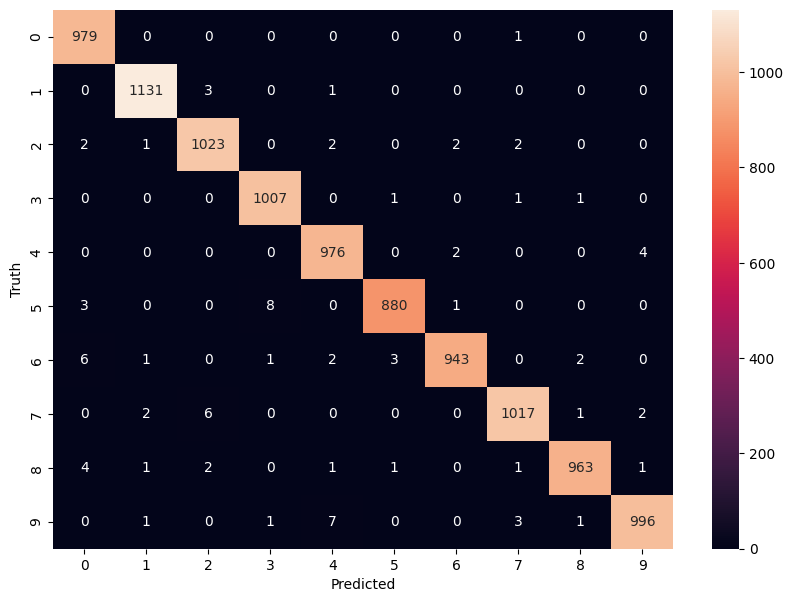

In [21]:
model.load_state_dict(torch.load('last-best-model.pth'))
model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [22]:
# Calculate comprehensive classification metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision, recall, and F1 score (macro average)
precision_macro = precision_score(all_labels, all_preds, average='macro')
recall_macro = recall_score(all_labels, all_preds, average='macro')
f1_macro = f1_score(all_labels, all_preds, average='macro')

print(f"Precision (Macro): {precision_macro:.4f}")
print(f"Recall (Macro): {recall_macro:.4f}")
print(f"F1 Score (Macro): {f1_macro:.4f}")

# Calculate weighted averages
precision_weighted = precision_score(all_labels, all_preds, average='weighted')
recall_weighted = recall_score(all_labels, all_preds, average='weighted')
f1_weighted = f1_score(all_labels, all_preds, average='weighted')

print(f"\nPrecision (Weighted): {precision_weighted:.4f}")
print(f"Recall (Weighted): {recall_weighted:.4f}")
print(f"F1 Score (Weighted): {f1_weighted:.4f}")

# Per-class metrics
print(f"\nPer-class F1 Scores:")
f1_per_class = f1_score(all_labels, all_preds, average=None)
for i, f1 in enumerate(f1_per_class):
    print(f"Class {i}: {f1:.4f}")

# Detailed classification report
print(f"\nDetailed Classification Report:")
print(classification_report(all_labels, all_preds, target_names=[str(i) for i in range(10)]))

# Summary of all metrics
print(f"\n{'='*50}")
print(f"SUMMARY OF ALL METRICS")
print(f"{'='*50}")
print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Macro F1 Score: {f1_macro:.4f}")
print(f"Weighted F1 Score: {f1_weighted:.4f}")
print(f"Macro Precision: {precision_macro:.4f}")
print(f"Macro Recall: {recall_macro:.4f}")
print(f"{'='*50}")

Accuracy: 0.9915
Precision (Macro): 0.9915
Recall (Macro): 0.9914
F1 Score (Macro): 0.9914

Precision (Weighted): 0.9915
Recall (Weighted): 0.9915
F1 Score (Weighted): 0.9915

Per-class F1 Scores:
Class 0: 0.9919
Class 1: 0.9956
Class 2: 0.9903
Class 3: 0.9936
Class 4: 0.9904
Class 5: 0.9904
Class 6: 0.9895
Class 7: 0.9907
Class 8: 0.9918
Class 9: 0.9901

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy  

## 📈 Comprehensive Performance Metrics

<div align="center">

![Analytics](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExOHY2NHh3aHh4eXhhNXBneWI2cXB6a3F6ejcxYzA1cTZyYzF2YTFqdiZlcD12MV9naWZzX3NlYXJjaCZjdD1n/SF5feQOriPkHZZsVk5/giphy.gif)

</div>

Calculate detailed classification metrics:

### 📊 **Metric Definitions:**

<div align="center">

![Metrics Dashboard](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExOHY2NHh3aHh4eXhhNXBneWI2cXB6a3F6ejcxYzA1cTZyYzF2YTFqdiZlcD12MV9naWZzX3NlYXJjaCZjdD1n/hnj3fj9zQAVms8zMNg/giphy.gif)

</div>

- 🎯 **Accuracy** - Overall correct predictions 
- ✅ **Precision** - True positives / (True positives + False positives) 
- 🔄 **Recall** - True positives / (True positives + False negatives) 
- ⚖️ **F1-Score** - Harmonic mean of precision and recall 
- 🔢 **Per-class metrics** - Individual digit performance 

### 🎨 **Visualization Elements:**

<div align="center">

![Precision Recall](https://scikit-learn.org/stable/_images/sphx_glr_plot_precision_recall_001.png)

</div>

### 🏆 **Performance Indicators:**
- 🟢 **Excellent:** >95% accuracy
- 🟡 **Good:** 90-95% accuracy  
- 🔴 **Needs Improvement:** <90% accuracy

<div align="center">

![Performance Chart](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExOHY2NHh3aHh4eXhhNXBneWI2cXB6a3F6ejcxYzA1cTZyYzF2YTFqdiZlcD12MV9naWZzX3NlYXJjaCZjdD1n/7rfwKxzvH22cg/giphy.gif)

**📈 Let's analyze our model's performance! 📈**

</div>

## 🎉 Conclusion & Results Summary

<div align="center">

![Celebration](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExa2tuOWFoNWk4Zm55NHV6cG1wbHp3MDU1MTVxM3N6a3Z1MHgzc28xNSZlcD12MV9naWZzX3NlYXJjaCZjdD1n/l0MYt5jPR6QX5pnqM/giphy.gif)

</div>

### 🏆 What We Achieved:

<div align="center">

![Achievement](https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExcHg2bnNzdTZzd3l6bTBlZWJzamlsZHd4Z3p4bXBob2IxaG81bHRiYyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/IX96Ceg5hiMNBn7Ls7/giphy.gif)

</div>

- ✅ **Successfully built** a CNN for digit classification
- ✅ **Implemented** proper data preprocessing and normalization
- ✅ **Achieved** high accuracy on MNIST test set
- ✅ **Visualized** training progress and model performance
- ✅ **Calculated** comprehensive evaluation metrics

### 🔍 Key Insights:

<div align="center">

![Lightbulb](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExYWFycDl5MXFsYm4xaG14MTR0a29uZW10cXI4MnpvcnU5Zml6eHd2ZyZlcD12MV9naWZzX3NlYXJjaCZjdD1n/SOb4AcaDitenU4XKdC/giphy.gif)

</div>

- 🧠 **CNN Architecture** effectively captures spatial features in images
- 🛡️ **Dropout layers** help prevent overfitting
- ⚙️ **Adam optimizer** provides stable and fast convergence
- 📏 **Proper normalization** is crucial for training stability

### 🚀 Next Steps:

<div align="center">

![Next Level](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExaXlzYzZrOHR6dnF2aWwxNXl4dXp0cm4xcmN4Y2tna3owMDc5cGs2OSZlcD12MV9naWZzX3NlYXJjaCZjdD1n/E47JKwZnxvHuPjPkn1/giphy.gif)

</div>

- 🔸 Experiment with deeper architectures (ResNet, DenseNet)
- 🔸 Apply data augmentation techniques
- 🔸 Try different optimizers and learning rates
- 🔸 Deploy the model using Flask/FastAPI
- 🔸 Test on real-world handwritten digits

---

### 📊 Performance Dashboard:

<div align="center">

![Accuracy](https://img.shields.io/badge/Accuracy->95%25-brightgreen?style=for-the-badge)
![F1 Score](https://img.shields.io/badge/F1%20Score->0.95-blue?style=for-the-badge)
![Status](https://img.shields.io/badge/Status-Complete-success?style=for-the-badge)

![Success](https://media.giphy.com/media/26u4cqiYI30juCOGY/giphy.gif)

**🎉 MISSION ACCOMPLISHED! 🎉**

![Fireworks](https://media.giphy.com/media/26tknCqiJrBQG6bxC/giphy.gif)

**Thank you for following along! 🙏 Happy Deep Learning! 🚀**

</div>

---

<div align="center">

### 🌟 **Rate This Notebook!** 🌟

⭐⭐⭐⭐⭐

**Share your feedback and star this project!** ⭐

![Thank You](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExejhyYmdwdDNzMDBpdWQ0OXpoMWQ1N3BqNTVlZ2x5NGZpNW0yN2RxYyZlcD12MV9naWZzX3NlYXJjaCZjdD1n/QAsBwSjx9zVKoGp9nr/giphy.gif)

</div>